**Business Case Evaluation**:
For this project, the goal is to predict house prices in Melbourne using various features from the dataset.

In [1]:
# Ignore warnings for cleaner output
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import KFold,cross_val_score

**Data Identification**:
In this step, we identify that we need data related to house prices and various features that might influence these prices.

In [3]:
# Load the dataset
house=pd.read_csv("Melbourne_housing_FULL.csv")
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# Display options for floating-point numbers
pd.options.display.float_format='{:.2f}'.format
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,...,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,...,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [5]:
house.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
house.shape

(34857, 21)

**Data Acquisition & Filtering**:  In this code, this step involves selecting relevant columns for analysis.

In [7]:
# Select relevant columns
col=['Suburb','Rooms','Type','Price','Method','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','CouncilArea','Lattitude','Longtitude','Regionname','Propertycount']
df=house[col]
df.head()

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,2.50,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,2,h,1480000.00,S,2.50,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,2,h,1035000.00,S,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,3,u,NaN,VB,2.50,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,3,h,1465000.00,SP,2.50,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [8]:
df.shape

(34857, 17)

In [9]:
# Check for unique values in each column
df.apply(pd.unique)

Suburb           [Abbotsford, Airport West, Albert Park, Alphin...
Rooms                      [2, 3, 4, 1, 5, 6, 7, 8, 10, 9, 12, 16]
Type                                                     [h, u, t]
Price            [nan, 1480000.0, 1035000.0, 1465000.0, 850000....
Method                          [SS, S, VB, SP, PI, SN, W, PN, SA]
Distance         [2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11...
Bedroom2         [2.0, 3.0, 4.0, 6.0, nan, 1.0, 5.0, 7.0, 0.0, ...
Bathroom         [1.0, 2.0, nan, 3.0, 7.0, 4.0, 0.0, 5.0, 6.0, ...
Car              [1.0, 0.0, 2.0, nan, 6.0, 5.0, 4.0, 3.0, 8.0, ...
Landsize         [126.0, 202.0, 156.0, 0.0, 134.0, 94.0, 120.0,...
BuildingArea     [nan, 79.0, 150.0, 142.0, 220.0, 210.0, 82.0, ...
YearBuilt        [nan, 1900.0, 2014.0, 2006.0, 1910.0, 2009.0, ...
CouncilArea      [Yarra City Council, Moonee Valley City Counci...
Lattitude        [-37.8014, -37.7996, -37.8079, -37.8114, -37.8...
Longtitude       [144.9958, 144.9984, 144.9934, 145.0116, 144.

In [10]:
df.dtypes

Suburb            object
Rooms              int64
Type              object
Price            float64
Method            object
Distance         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [11]:
df.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.00,27247.00,34856.00,26640.00,26631.00,26129.00,23047.00,13742.00,15551.00,26881.00,26881.00,34854.00
mean,3.03,1050173.34,11.18,3.08,1.62,1.73,593.60,160.26,1965.29,-37.81,145.00,7572.89
std,0.97,641467.13,6.79,0.98,0.72,1.01,3398.84,401.27,37.33,0.09,0.12,4428.09
min,1.00,85000.00,0.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.19,144.42,83.00
25%,2.00,635000.00,6.40,2.00,1.00,1.00,224.00,102.00,1940.00,-37.86,144.93,4385.00
50%,3.00,870000.00,10.30,3.00,2.00,2.00,521.00,136.00,1970.00,-37.81,145.01,6763.00
75%,4.00,1295000.00,14.00,4.00,2.00,2.00,670.00,188.00,2000.00,-37.75,145.07,10412.00
max,16.00,11200000.00,48.10,30.00,12.00,26.00,433014.00,44515.00,2106.00,-37.39,145.53,21650.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Price          27247 non-null  float64
 4   Method         34857 non-null  object 
 5   Distance       34856 non-null  float64
 6   Bedroom2       26640 non-null  float64
 7   Bathroom       26631 non-null  float64
 8   Car            26129 non-null  float64
 9   Landsize       23047 non-null  float64
 10  BuildingArea   13742 non-null  float64
 11  YearBuilt      15551 non-null  float64
 12  CouncilArea    34854 non-null  object 
 13  Lattitude      26881 non-null  float64
 14  Longtitude     26881 non-null  float64
 15  Regionname     34854 non-null  object 
 16  Propertycount  34854 non-null  float64
dtypes: float64(11), int64(1), object(5)
memory usage: 

**Data Extraction**:
In this analysis, the Data Extraction step is not explicitly present because the dataset we are working with is already in a well-structured format(CSV file). Typically, Data Extraction involves transforming raw, unstructured data into a structured format suitable for analysis. This might include parsing text files extracting data from APIs or merging multiple datasets.

**Data Validation & Cleansing**: In this code, we handle missing values by filling them with appropriate statistics and removing outliers.

In [13]:
# Check for missing values
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [14]:
# Handle missing values
df[df.isnull().any(axis=1)]

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,2.50,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,2,h,1480000.00,S,2.50,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
3,Abbotsford,3,u,NaN,VB,2.50,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
5,Abbotsford,3,h,850000.00,PI,2.50,3.00,2.00,1.00,94.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
7,Abbotsford,4,h,NaN,SN,2.50,3.00,2.00,2.00,400.00,220.00,2006.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34848,Wollert,4,h,621000.00,S,25.50,4.00,2.00,2.00,375.00,NaN,NaN,Whittlesea City Council,-37.61,145.03,Northern Metropolitan,2940.00
34850,Wollert,3,h,NaN,SP,25.50,3.00,2.00,2.00,268.00,135.00,2016.00,Whittlesea City Council,-37.61,145.04,Northern Metropolitan,2940.00
34851,Yarraville,3,h,1101000.00,S,6.30,3.00,1.00,NaN,288.00,NaN,NaN,Maribyrnong City Council,-37.81,144.89,Western Metropolitan,6543.00
34852,Yarraville,4,h,1480000.00,PI,6.30,4.00,1.00,3.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00


In [15]:
# Drop rows where all values are missing
df.dropna(how='all',inplace=True)

In [16]:
# Drop rows with more than 10 missing values
df[df.isna().sum(axis=1)>=10]

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2,u,710000.00,S,5.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2,h,825000.00,VB,7.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,3,h,616000.00,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
index_drop=df[df.isna().sum(axis=1)>=10].index

In [18]:
df.drop(index=index_drop,inplace=True)
df.shape

(34854, 17)

In [19]:
# Fill missing values with 0
fill_zero=['Bedroom2','Bathroom','Car','Propertycount']
df[fill_zero]=df[fill_zero].fillna(0)
df.head()

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,2.50,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,2,h,1480000.00,S,2.50,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,2,h,1035000.00,S,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,3,u,NaN,VB,2.50,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,3,h,1465000.00,SP,2.50,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [20]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
Distance             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11807
BuildingArea     21112
YearBuilt        19303
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
dtype: int64

In [21]:
# Replace missing values in 'Price' with median
df['Price'].fillna(value=df['Price'].median(),inplace=True)

In [22]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price                0
Method               0
Distance             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11807
BuildingArea     21112
YearBuilt        19303
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
dtype: int64

In [23]:
# Replace missing values in the columns with mean
df['Landsize'].fillna(value=df['Landsize'].mean(),inplace=True)
df['BuildingArea'].fillna(value=df['BuildingArea'].mean(),inplace=True)
df['Lattitude'].fillna(value=df['Lattitude'].mean(),inplace=True)
df['Longtitude'].fillna(value=df['Longtitude'].mean(),inplace=True)

In [24]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price                0
Method               0
Distance             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea         0
YearBuilt        19303
CouncilArea          0
Lattitude            0
Longtitude           0
Regionname           0
Propertycount        0
dtype: int64

In [25]:
df['YearBuilt'].fillna(method='ffill',limit=None,inplace=True)

In [26]:
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        2
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

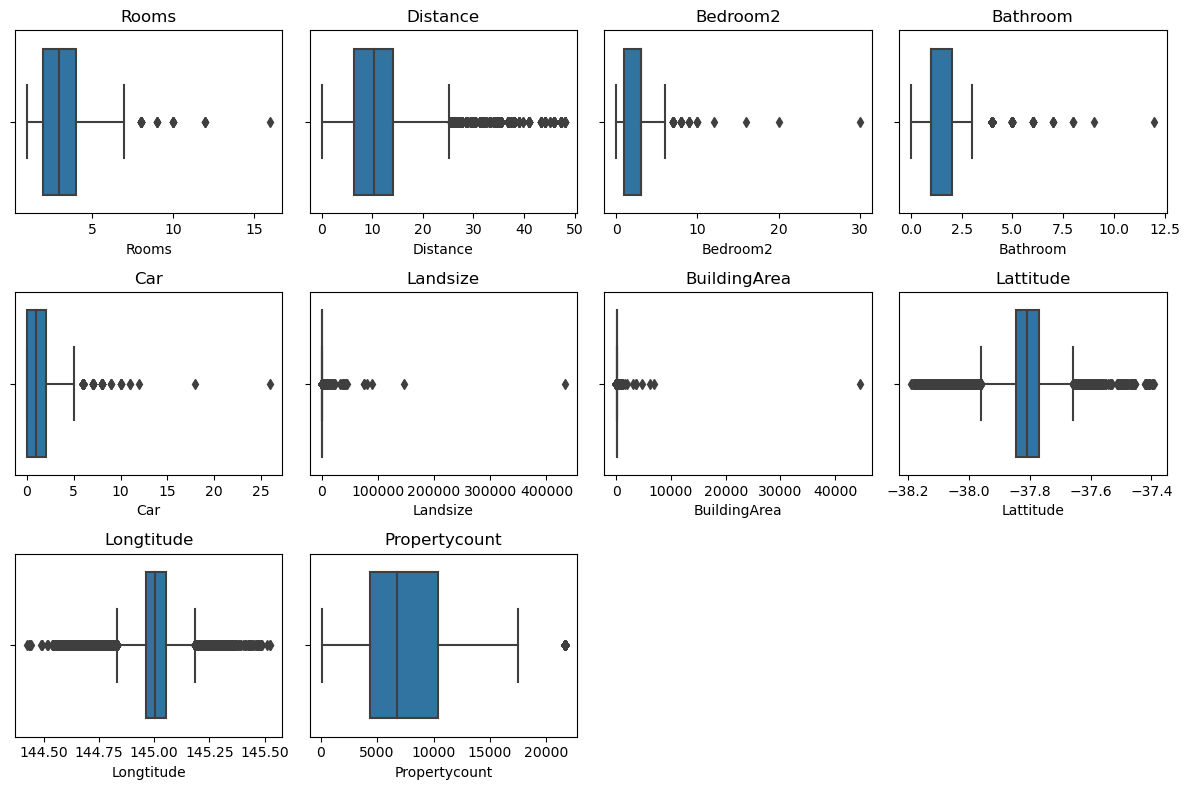

In [29]:
# Visualize distributions and detect outliers
num_col= ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Lattitude','Longtitude','Propertycount']
# Creating boxplot using seaborn
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_col):
    plt.subplot(3,4,i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

In [30]:
# Calculate Z-scores for outlier detection
z_scores=np.abs(stats.zscore(df[num_col]))
threshold=3
outliers=(z_scores > threshold).any(axis=1)

In [31]:
# Drop rows containing outliers
df=df[~outliers]
df

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,2,h,1035000.00,S,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,3,u,870000.00,VB,2.50,3.00,2.00,1.00,0.00,160.26,1900.00,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,3,h,1465000.00,SP,2.50,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
5,Abbotsford,3,h,850000.00,PI,2.50,3.00,2.00,1.00,94.00,160.26,1900.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
6,Abbotsford,4,h,1600000.00,VB,2.50,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.00,PI,6.30,4.00,1.00,3.00,593.00,160.26,2016.00,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,2,h,888000.00,SP,6.30,2.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,2,t,705000.00,S,6.30,2.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,3,h,1140000.00,SP,6.30,0.00,0.00,0.00,593.60,160.26,2000.00,Maribyrnong City Council,-37.81,145.00,Western Metropolitan,6543.00


**Data Aggregation & Representation**: In this code, we calculate the mean price per suburb.

In [32]:
# find mean price per suburb
df.groupby('Suburb').aggregate({'Price':'mean'}).sort_values(by='Price',ascending=False)

,Price
Suburb,
Canterbury,1752879.70
Middle Park,1713697.37
Brighton,1632257.20
Albert Park,1615980.62
Deepdene,1590227.27
...,...
Werribee South,497500.00
Werribee,493340.00
Mickleham,485000.00


In [33]:
# Visualize correlations between numeric features
df1=df.select_dtypes(include=["float64","int64"])
df1.corr()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.00,0.41,0.31,0.54,0.43,0.34,0.15,0.39,0.03,0.02,0.12,-0.08
Price,0.41,1.00,-0.15,0.26,0.28,0.18,0.08,0.27,-0.15,-0.19,0.14,0.00
Distance,0.31,-0.15,1.00,0.14,0.08,0.18,0.14,0.11,0.26,-0.02,0.32,-0.12
Bedroom2,0.54,0.26,0.14,1.00,0.85,0.73,0.02,0.21,0.01,0.02,0.09,-0.04
Bathroom,0.43,0.28,0.08,0.85,1.00,0.67,0.00,0.24,0.07,-0.03,0.10,-0.02
Car,0.34,0.18,0.18,0.73,0.67,1.00,0.07,0.16,0.08,-0.01,0.08,-0.04
Landsize,0.15,0.08,0.14,0.02,0.00,0.07,1.00,0.13,0.04,0.00,0.12,-0.02
BuildingArea,0.39,0.27,0.11,0.21,0.24,0.16,0.13,1.00,0.04,-0.04,0.09,-0.02
YearBuilt,0.03,-0.15,0.26,0.01,0.07,0.08,0.04,0.04,1.00,0.07,0.01,-0.02
Lattitude,0.02,-0.19,-0.02,0.02,-0.03,-0.01,0.00,-0.04,0.07,1.00,-0.30,-0.03


<Axes: >

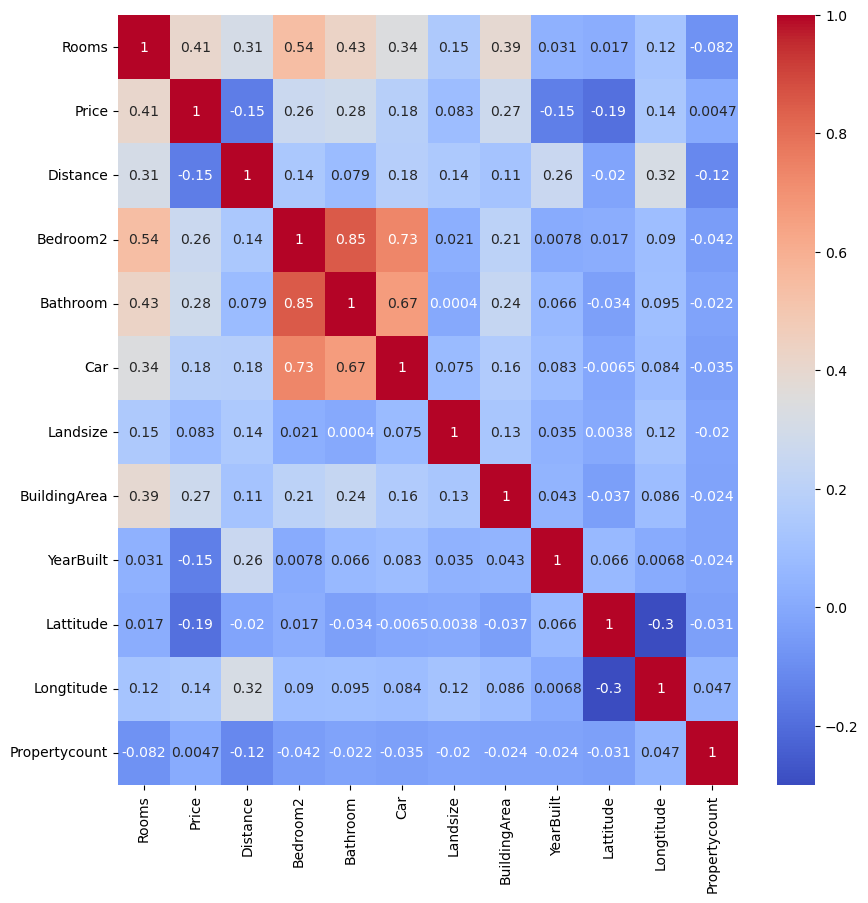

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),cmap="coolwarm",annot=True)

In [35]:
df1.corr()['Price'].sort_values(ascending=False)

Price            1.00
Rooms            0.41
Bathroom         0.28
BuildingArea     0.27
Bedroom2         0.26
Car              0.18
Longtitude       0.14
Landsize         0.08
Propertycount    0.00
YearBuilt       -0.15
Distance        -0.15
Lattitude       -0.19
Name: Price, dtype: float64

**Data Analysis**: In this code, we perform exploratory data analysis and build machine learning models to predict house prices.

In [36]:
# Frequency Encoding function
def frequency_encoding(df,column):
    freq= df.groupby(column).size()/len(df)
    df[column +'_freq']=df[column].map(freq)
    return df

In [37]:
# Apply frequency encoding to each categorical column
cat_col=['Suburb','Method','Regionname','CouncilArea','Type']
for column in cat_col:
    df=frequency_encoding(df,column)

In [38]:
# Drop the original categorical columns
df.drop(columns=cat_col,inplace=True)
df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Suburb_freq,Method_freq,Regionname_freq,CouncilArea_freq,Type_freq
2,2,1035000.00,2.50,2.00,1.00,0.00,156.00,79.00,1900.00,-37.81,144.99,4019.00,0.00,0.57,0.27,0.04,0.67
3,3,870000.00,2.50,3.00,2.00,1.00,0.00,160.26,1900.00,-37.81,145.01,4019.00,0.00,0.09,0.27,0.04,0.22
4,3,1465000.00,2.50,3.00,2.00,0.00,134.00,150.00,1900.00,-37.81,144.99,4019.00,0.00,0.14,0.27,0.04,0.67
5,3,850000.00,2.50,3.00,2.00,1.00,94.00,160.26,1900.00,-37.80,145.00,4019.00,0.00,0.14,0.27,0.04,0.67
6,4,1600000.00,2.50,3.00,1.00,2.00,120.00,142.00,2014.00,-37.81,144.99,4019.00,0.00,0.09,0.27,0.04,0.67


In [39]:
# Define features (x)
x=df.drop(["Price","Bedroom2"],axis=1)
x

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Suburb_freq,Method_freq,Regionname_freq,CouncilArea_freq,Type_freq
2,2,2.50,1.00,0.00,156.00,79.00,1900.00,-37.81,144.99,4019.00,0.00,0.57,0.27,0.04,0.67
3,3,2.50,2.00,1.00,0.00,160.26,1900.00,-37.81,145.01,4019.00,0.00,0.09,0.27,0.04,0.22
4,3,2.50,2.00,0.00,134.00,150.00,1900.00,-37.81,144.99,4019.00,0.00,0.14,0.27,0.04,0.67
5,3,2.50,2.00,1.00,94.00,160.26,1900.00,-37.80,145.00,4019.00,0.00,0.14,0.27,0.04,0.67
6,4,2.50,1.00,2.00,120.00,142.00,2014.00,-37.81,144.99,4019.00,0.00,0.09,0.27,0.04,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,6.30,1.00,3.00,593.00,160.26,2016.00,-37.81,144.88,6543.00,0.01,0.14,0.19,0.04,0.67
34853,2,6.30,2.00,1.00,98.00,104.00,2018.00,-37.82,144.89,6543.00,0.01,0.14,0.19,0.04,0.67
34854,2,6.30,1.00,2.00,220.00,120.00,2000.00,-37.82,144.88,6543.00,0.01,0.57,0.19,0.04,0.11
34855,3,6.30,0.00,0.00,593.60,160.26,2000.00,-37.81,145.00,6543.00,0.01,0.14,0.19,0.04,0.67


In [40]:
# Define target (y)
y=df['Price']
y

2       1035000.00
3        870000.00
4       1465000.00
5        850000.00
6       1600000.00
           ...    
34852   1480000.00
34853    888000.00
34854    705000.00
34855   1140000.00
34856   1020000.00
Name: Price, Length: 32038, dtype: float64

In [41]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)

In [42]:
# Check mean and standard deviation of features in x_train
print("Mean of x_train:")
print(np.mean(x_train,axis=0))
print("\nStandard deviation of x_train:")
print(np.std(x_train,axis=0))

Mean of x_train:
Rooms                 2.98
Distance             10.37
Bathroom              1.21
Car                   1.22
Landsize            526.88
BuildingArea        156.96
YearBuilt          1964.23
Lattitude           -37.81
Longtitude          145.01
Propertycount      7128.17
Suburb_freq           0.01
Method_freq           0.37
Regionname_freq       0.26
CouncilArea_freq      0.05
Type_freq             0.51
dtype: float64

Standard deviation of x_train:
Rooms                 0.92
Distance              5.54
Bathroom              0.90
Car                   1.03
Landsize            409.18
BuildingArea         51.72
YearBuilt            38.30
Lattitude             0.07
Longtitude            0.09
Propertycount      3761.01
Suburb_freq           0.00
Method_freq           0.23
Regionname_freq       0.10
CouncilArea_freq      0.03
Type_freq             0.23
dtype: float64


In [43]:
# Standardize the features
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
print("Scaled x_train:\n",x_train)
print("\nScaled x_test:\n",x_test)

Scaled x_train:
 [[-1.06112481  1.35949083 -1.34116902 ...  0.08142856 -1.11568803
  -1.25697894]
 [-1.06112481 -0.35577301 -1.34116902 ... -0.69427727 -0.97911215
  -1.25697894]
 [ 0.02314935  0.60116366 -0.23486227 ...  1.08298527  0.03527411
   0.69466337]
 ...
 [-1.06112481 -1.3668759  -1.34116902 ...  0.08142856  0.27738588
  -1.25697894]
 [ 0.02314935 -1.24048804 -0.23486227 ...  0.08142856  0.27738588
   0.69466337]
 [ 1.10742352  2.73170189  0.87144447 ...  0.08142856 -1.11568803
   0.69466337]]

Scaled x_test:
 [[ 1.10742352  0.4747758  -1.34116902 ...  1.08298527  0.34567382
  -1.73941794]
 [ 0.02314935 -0.21132974  0.87144447 ...  1.08298527  2.29622562
   0.69466337]
 [ 1.10742352 -1.09604477  0.87144447 ... -0.69427727  0.05638129
   0.69466337]
 ...
 [ 2.19169769 -0.21132974  0.87144447 ...  1.08298527  2.29622562
   0.69466337]
 [-1.06112481 -0.80715823  0.87144447 ... -0.69427727  0.05638129
  -1.73941794]
 [ 0.02314935 -0.752992    0.87144447 ... -0.69427727 -0.9791121

In [44]:
# Check mean and std deviation again
print("Mean of x_train after scaling:")
print(np.mean(x_train,axis=0))
print("\nStandard deviation of x_train after scaling:")
print(np.std(x_train,axis=0))

Mean of x_train after scaling:
[-6.80143288e-17 -1.59685815e-16  1.96650125e-17  6.89014722e-17
  1.49040094e-16 -1.17990075e-16 -2.13091849e-15  4.84242800e-14
  4.87396594e-14 -8.32436242e-17 -1.65600105e-17 -6.62400420e-17
  5.58900354e-16  3.22920205e-16 -4.73734586e-16]

Standard deviation of x_train after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
# Train a Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
# Model Evaluation
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([1011595.03068204, 1499981.25141793, 1313752.39650602, ...,
       1855498.10034728,  641149.547843  , 1068131.74072433])

In [57]:
print("MAE",mean_absolute_error(y_test,y_pred_lr))
print("MSE",mean_squared_error(y_test,y_pred_lr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("R-Squared",r2_score(y_pred_lr,y_test))

MAE 290494.4785604552
MSE 198180223832.0944
RMSE 445174.3746354841
R-Squared -0.6452649133092876


In [48]:
# Cross-validation to assess model performance
kf=KFold(n_splits=5,shuffle=True,random_state=25)
cv_lr=cross_val_score(lr,x,y,cv=kf,scoring='r2')
print("Cross-validation R-squared scores:",cv_lr)
print("Mean R-squared:",np.mean(cv_lr))

Cross-validation R-squared scores: [0.3473832  0.39445995 0.382641   0.36215687 0.36450031]
Mean R-squared: 0.3702282661430578


In [49]:
rf=RandomForestRegressor(n_estimators=150,random_state=25)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=150, random_state=25)

In [50]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([1383400.        , 1627304.58666667, 1394406.66666667, ...,
       1598873.33333333,  727166.66666667,  924270.        ])

In [56]:
print("MAE",mean_absolute_error(y_test,y_pred_rf))
print("MSE",mean_squared_error(y_test,y_pred_rf))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("R-Squared",r2_score(y_pred_rf,y_test))

MAE 226719.55768025675
MSE 156036468644.09076
RMSE 395014.51700423716
R-Squared 0.15512374162669884


In [52]:
cv_rf = cross_val_score(rf, x, y, cv=kf, scoring='r2')
print("Cross-validation R-squared scores:",cv_rf)
print("Mean R-squared:",np.mean(cv_rf))

Cross-validation R-squared scores: [0.50955421 0.53143506 0.5048084  0.48142818 0.48942082]
Mean R-squared: 0.5033293332372986


**Data Visualization**: In this code, we plot actual vs predicted values for our models.

Text(0, 0.5, 'Actual values')

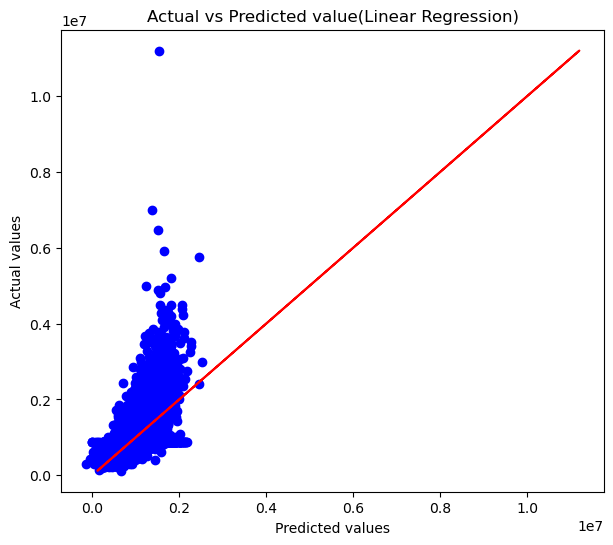

In [53]:
# Plot actual vs predicted values
plt.figure(figsize=(7,6))
plt.scatter(y_pred_lr,y_test,color="blue")
plt.plot(y_test,y_test,color="red")
plt.title("Actual vs Predicted value(Linear Regression)")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

Text(0, 0.5, 'Actual values')

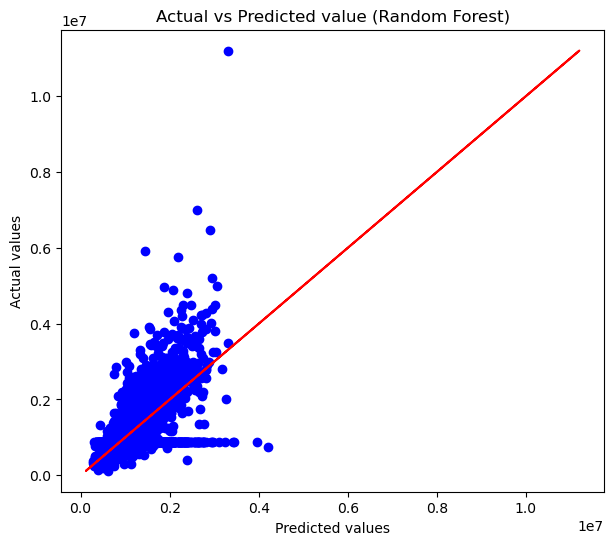

In [54]:
# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(7, 6))
plt.scatter(y_pred_rf, y_test, color="blue")
plt.plot(y_test, y_test, color="red")
plt.title("Actual vs Predicted value (Random Forest)")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

**Utilization of Analysis Results**: In this project, the analysis aims to predict house prices in Melbourne based on various features. The utilization stage focuses on leveraging these predictions and insights for practical applications such as:

- **Real Estate Market Strategies**: Using predictive models to adjust pricing strategies based on predicted house prices in different suburbs or regions.
  
- **Investment Decisions**: Providing insights for potential property investors on where to focus their investments based on predicted returns and market trends.

In [55]:
# Compare Linear Regression and Random Forest metrics
print("Linear Regression:")
print("R-Squared:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Cross-validation R-squared scores:",cv_lr)
print("Mean R-squared:",np.mean(cv_lr))

print("\nRandom Forest:")
print("R-Squared:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Cross-validation R-squared scores:",cv_rf)
print("Mean R-squared:",np.mean(cv_rf))

Linear Regression:
R-Squared: 0.3544530554937416
RMSE: 445174.3746354841
Cross-validation R-squared scores: [0.3473832  0.39445995 0.382641   0.36215687 0.36450031]
Mean R-squared: 0.3702282661430578

Random Forest:
R-Squared: 0.49173099304761814
RMSE: 395014.51700423716
Cross-validation R-squared scores: [0.50955421 0.53143506 0.5048084  0.48142818 0.48942082]
Mean R-squared: 0.5033293332372986
